In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
csvFolder = 'csv'

file1 = 'Report_b-pulseAlongX_0.22_newNac_0000_populations.csv'
file2 = 'Report_b-pulseAlongX_0.22_newNac_0000_regions.csv'
file3 = 'Report_m-only_IR_longer_with_nac_2_1_0000_populations.csv'
file4 = 'Report_m-only_IR_longer_with_nac_2_1_0000_regions.csv'
file5 = 'Report_zz-from2withouspulse_last_iteration_0000_populations.csv'
file6 = 'Report_zz-from2withouspulse_last_iteration_0000_regions.csv'

In [3]:
df1 = pd.read_csv(os.path.join(csvFolder,file1))
df2 = pd.read_csv(os.path.join(csvFolder,file2))
df3 = pd.read_csv(os.path.join(csvFolder,file3))
df4 = pd.read_csv(os.path.join(csvFolder,file4))
df5 = pd.read_csv(os.path.join(csvFolder,file5))
df6 = pd.read_csv(os.path.join(csvFolder,file6))

In [62]:
df1.iloc[[300,-1]]

,Unnamed: 0,count,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation,Xpulse,...,Zpulse,0,1,2,3,4,5,6,7,8
300,300,300,30000,15.015027,0.002399,0.224681,3.480965,3.705646,-3.458067,-3.090386e-11,...,0.0,15.0150,0.403427,0.542344,0.008699,0.006557,0.018780,0.010161,0.000871,0.004366
4000,4000,4000,399999,200.199861,0.012050,0.555110,3.039460,3.594569,-3.346990,-0.000000e+00,...,0.0,200.1999,0.504414,0.418540,0.022807,0.010423,0.008103,0.006879,0.002493,0.002385


In [63]:
a = df5.iloc[[300,-1]]['Total']
a

300     5.830142
1260    5.772716
Name: Total, dtype: float64

In [64]:
def calcola(df,end_of_pulse_step,end_of_dyns_step,label):
    
    time = df.iloc[end_of_pulse_step]['fs']
    time2 = df.iloc[end_of_dyns_step]['fs']
    
    # population in S_0 labeled 1 in the graph
    a = df.iloc[[end_of_pulse_step,end_of_dyns_step]]['1']
    
    # this is the gain in population of S_0
    da = a.iloc[1] - a.iloc[0]
    
    # this is the population of S_1
    b = df.iloc[end_of_pulse_step]['2']
    
    # this is the ratio... how much S_1 goes back to S_0
    c = da/b
    
    total_initial = df.iloc[0]['Total']
    total_final = df.iloc[end_of_dyns_step]['Total']
    total = total_final - total_initial
    
    string = '{}\ntime of end pulse -> {:8.3f} fs\ntime of end dyn -> {:8.3f} fs\ngain in population S0 at the end_step: {:8.5f}\nS1 population after pulse: {:8.5f}\nRatio: {:8.5f}\nTotal = {:6.3f} Hartree\n\n'
        
    print(string.format(label,time,time2,da,b,c,total))
    return c
    
final_frame = 1260
    
aa = calcola(df1,300,final_frame*2,'UV')
bb = calcola(df3,300,final_frame*2,'IR')
#cc = calcola(df5,0,final_frame,'FC')
# print(aa,bb,cc)

print (bb/aa)
print (aa/bb)
#print (bb/cc)

UV
time of end pulse ->   15.015 fs
time of end dyn ->  126.126 fs
gain in population S0 at the end_step:  0.04348
S1 population after pulse:  0.54234
Ratio:  0.08018
Total =  3.371 Hartree


IR
time of end pulse ->   15.015 fs
time of end dyn ->  126.126 fs
gain in population S0 at the end_step:  0.00936
S1 population after pulse:  0.08148
Ratio:  0.11486
Total =  2.415 Hartree


1.43259569022
0.698033650967


In [65]:
normalize = False

if normalize:
    FC_norm = df6['products'] + df6['reactants']
    IR_norm = df4['products'] + df4['reactants']
    UV_norm = df2['products'] + df2['reactants']
else:
    FC_norm,IR_norm,UV_norm = 1.0,1.0,1.0
    
# FC_ratio = np.nan_to_num(df6['products']/df6['reactants'])
# FC_fs = df6['fs']
IR_ratio = (df4['products']/df4['reactants'])*IR_norm
IR_fs = df4['fs']
UV_ratio = (df2['products']/df2['reactants'])*UV_norm
UV_fs = df2['fs']

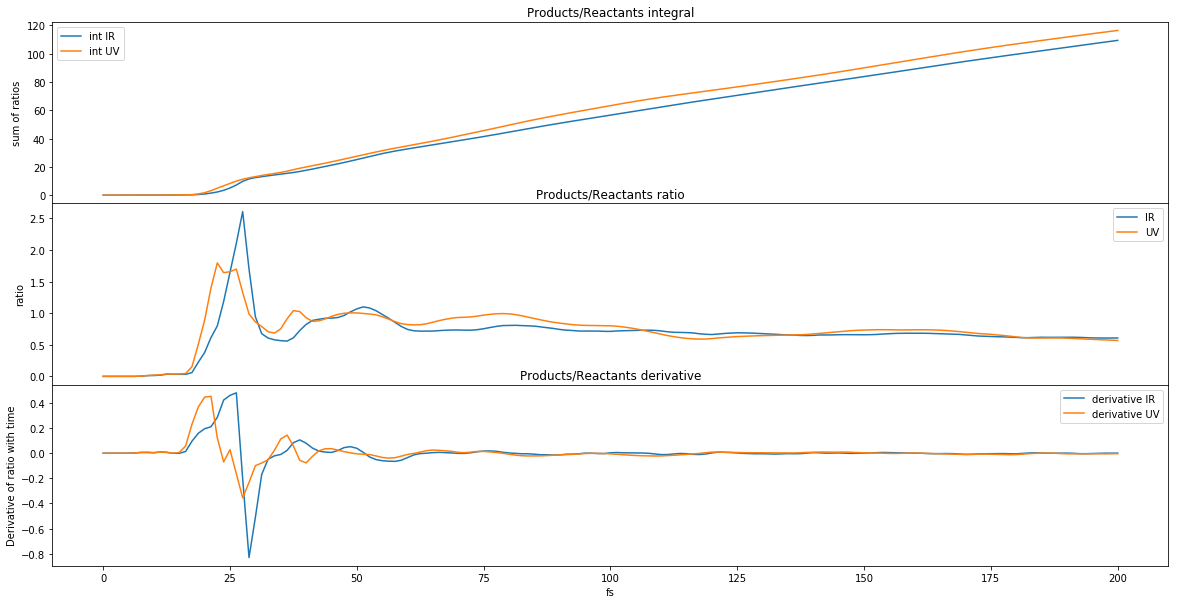

In [67]:
fig , [ax0,ax1,ax2] = plt.subplots(3, 1,sharex = True,figsize=(20,10))
fig.subplots_adjust(hspace=0)

#ax0.plot(FC_fs,FC_ratio,label='FC')
ax0.plot(IR_fs,np.cumsum(IR_ratio),label='int IR')
ax0.plot(UV_fs,np.cumsum(UV_ratio),label='int UV')
ax0.set_title('Products/Reactants integral')
ax0.set_ylabel('sum of ratios')
ax0.legend()

ax1.plot(IR_fs,IR_ratio,label='IR')
ax1.plot(UV_fs,UV_ratio,label='UV')
ax1.set_title('Products/Reactants ratio')
ax1.set_ylabel('ratio')
ax1.legend()

#ax1.plot(FC_fs,np.gradient(FC_ratio),label='derivative FC')
ax2.plot(IR_fs,np.gradient(IR_ratio),label='derivative IR')
ax2.plot(UV_fs,np.gradient(UV_ratio),label='derivative UV')
ax2.set_xlabel('fs')
ax2.set_title('Products/Reactants derivative')
ax2.set_ylabel('Derivative of ratio with time')
ax2.legend()



In [73]:
df4.iloc[-1]['products']/df4.iloc[-1]['reactants']

0.60744329673737785

In [74]:
df2.iloc[-1]['products']/df2.iloc[-1]['reactants']

0.56782917687196044